# Read and analyze results from running the detection algorithm on APF data

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os, glob #glob.glob(DIR_NAME + '/*fits')

## Read in Reduced Data from Anna Zuckerman's repo

In [241]:
directory = '/mnt_home/azuckerman/APF_spectra/NDR_corrected_wl_scale'

# every file in Anna's NDR_corrected_wl_scale folder
list_of_files = []
for filename in os.listdir(directory):
    if filename.endswith(".fits"): 
        file_path = os.path.join(directory, filename)
        list_of_files = np.append(list_of_files, file_path)

## Look at total detections tables

In [242]:
results1000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults1000/results.csv', index_col = 'index')
results3000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults3000/results.csv', index_col = 'index')
results4000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults4000/results.csv', index_col = 'index')
results5000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults5000/results.csv', index_col = 'index')
results6000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults6000/results.csv', index_col = 'index')

results2000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults2000/results.csv', index_col = 'index')


results1000 = results1000.drop(columns = 'Unnamed: 0')
results2000 = results2000.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
results3000 = results3000.drop(columns = 'Unnamed: 0')
results4000 = results4000.drop(columns = 'Unnamed: 0')
results5000 = results5000.drop(columns = 'Unnamed: 0')
results6000 = results6000.drop(columns = 'Unnamed: 0')

In [243]:
total_results = results1000.append([results2000, results3000, results4000, results5000, results6000])

In [244]:
total_results
# all 5866 of the spectra - excludes spectra 1760 and 1762

,star,ndetections
index,,
0,HIP12444,0
1,HIP19855,2
2,HIP12444,2
3,HIP12444,2
4,HIP42172,2
...,...,...
5863,HD172167,1
5864,Vega,0
5865,HD187642,4


## Create a histogram of all the detections across all the spectra

In [245]:
num_detections = total_results['ndetections']

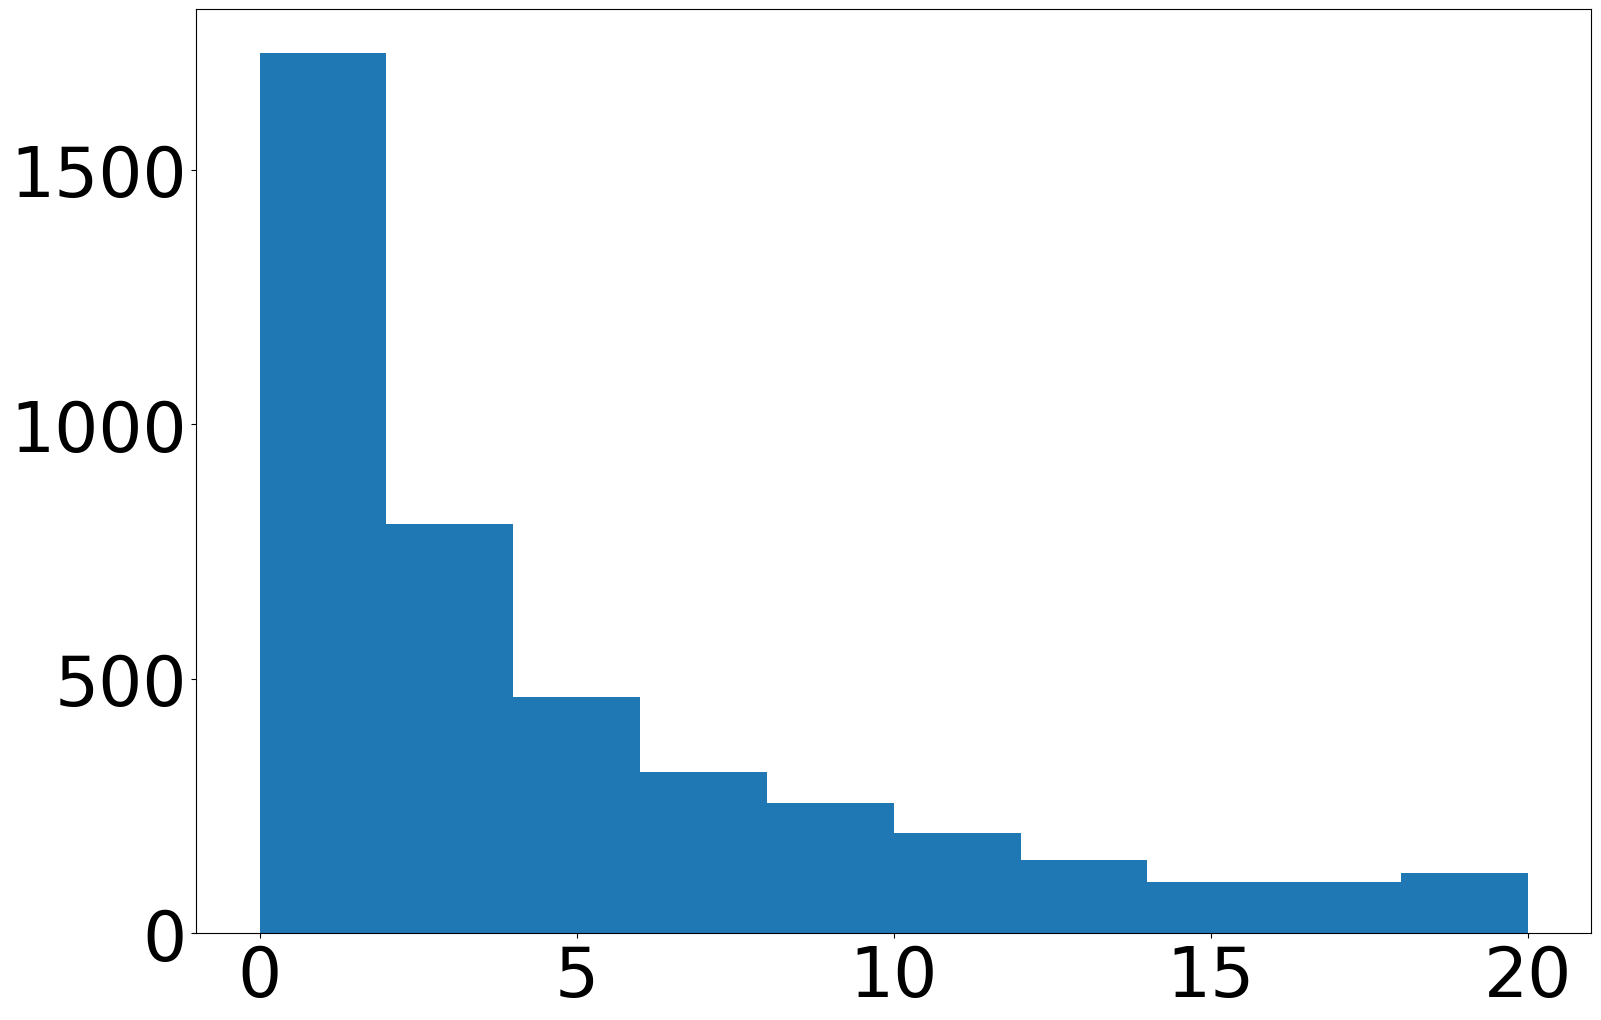

In [246]:
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 50})
plt.hist(num_detections.tolist(), range=[0, 20])
plt.show()

In [247]:
sum(num_detections)

245756

## Create a histogram of all the detections across all unique stars

In [248]:
total_results['star'].value_counts()

KIC8462852t       158
HIP22449          143
HIP46853          124
HIP102422         120
HIP12777          113
HIP4151            97
HIP51459           64
HIP96441           61
HIP57757           56
hip44072           48
HIP95501           46
HIP64394           46
HIP109176          43
hip36357           41
HIP70497           40
HIP102488          38
GJ280              36
HIP50583           29
HIP10644           28
HIP95853           28
HIP95575           25
HIP95995           25
Vega               24
HIP77070           24
HIP15457           23
HIP109427          22
HIP112748          22
HIP95730           22
HIP56445           22
HIP71957           22
HIP518             22
HIP77760           21
GJ860B             21
HIP78072           20
HIP111169          20
HIP114971          20
KIC8462852         20
HIP36366           19
HIP94650           19
HIP94349           19
HIP94376           19
HIP443             19
HIP113963          18
HIP112724          18
HIP92043           16
HIP194    

In [249]:
aggregation_functions = {'ndetections': 'median'}
total_results_by_star = total_results.groupby(total_results['star']).aggregate(aggregation_functions)

In [250]:
total_results_by_star

,ndetections
star,
Alderami,1.0
Altair,0.0
GJ1002,636.0
GJ144,5.0
GJ234,270.0
GJ244,0.0
GJ280,0.0
GJ54.1,405.5
GJ628,289.0


In [251]:
print('there are ' + str(total_results_by_star.shape[0]) + ' unique stars')

there are 852 unique stars


In [252]:
num_detections_by_star = total_results_by_star['ndetections']

In [253]:
max_num_detections = max(num_detections_by_star)
print('max # of detections: ' + str(max_num_detections))

max # of detections: 723.0


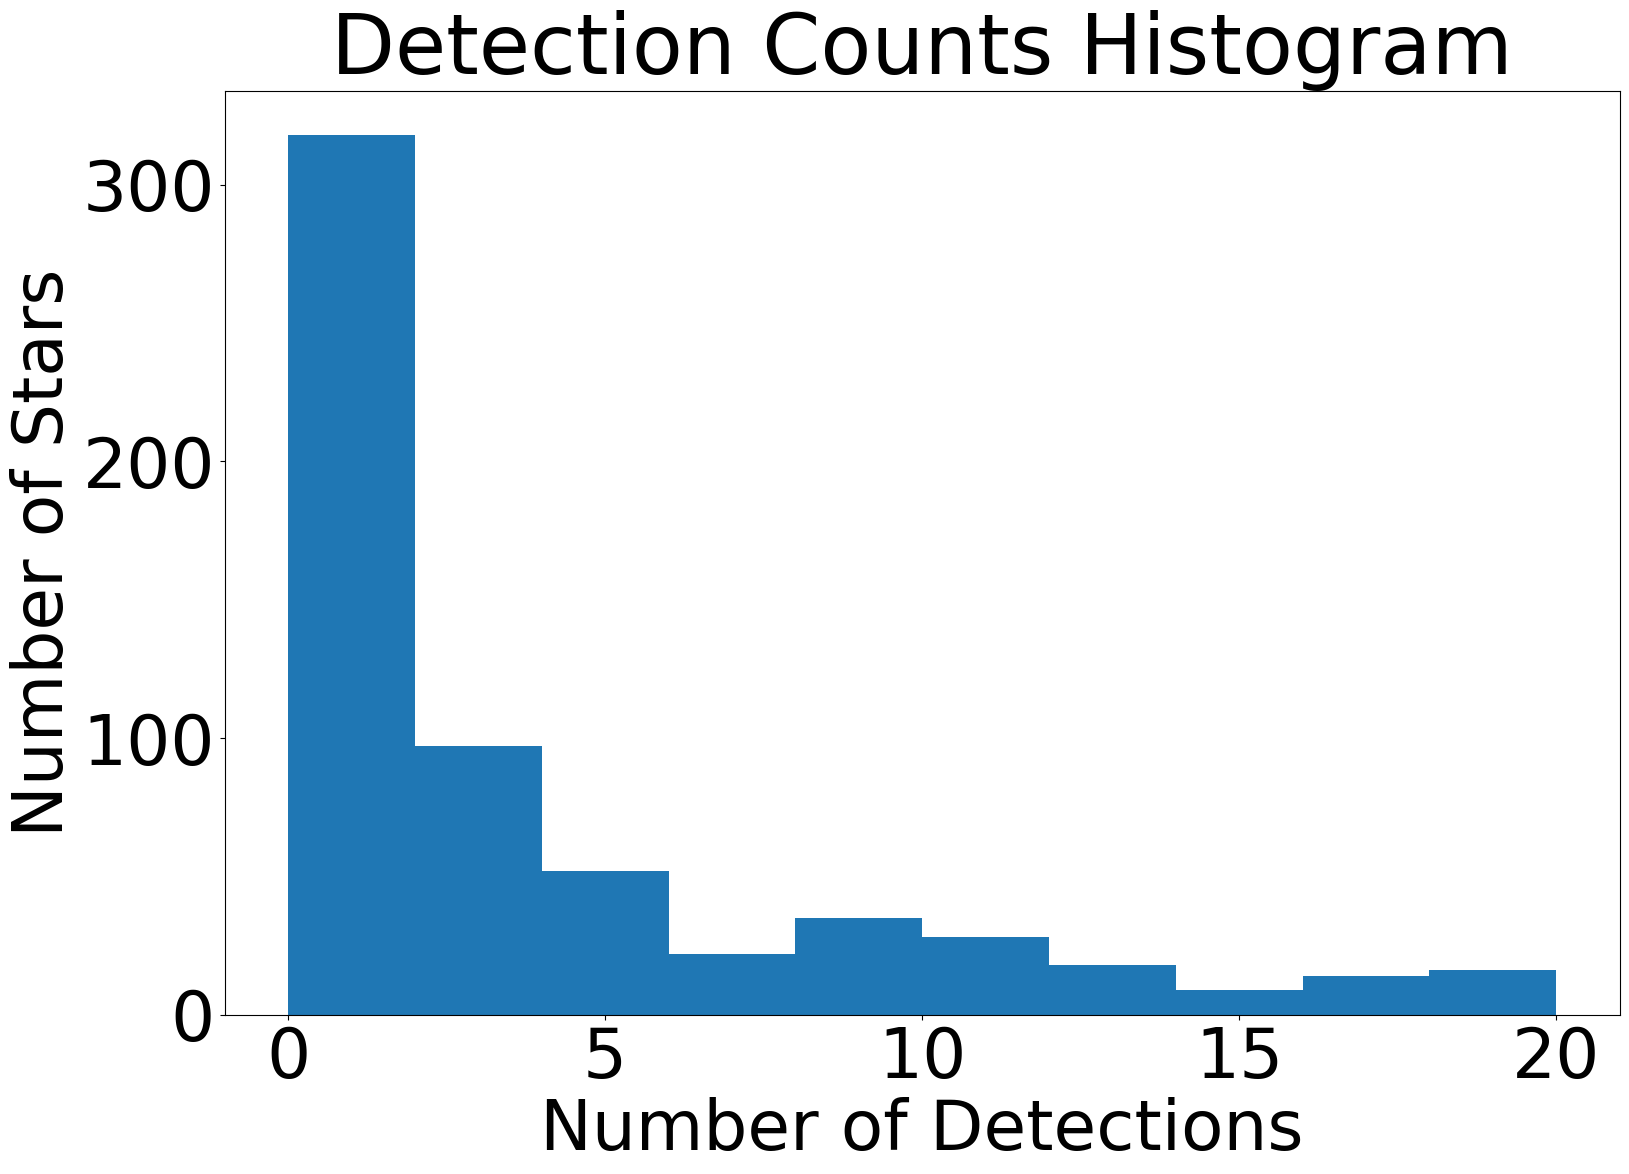

In [254]:
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 50})
plt.hist(num_detections_by_star, range=[0, 20])
plt.xlabel('Number of Detections')
plt.ylabel('Number of Stars')
plt.title('Detection Counts Histogram')
plt.show()

## Find percentage of stars that have a certain # of detections

In [255]:
num_stars = total_results_by_star.shape[0]

In [256]:
zero_detections = total_results_by_star[total_results_by_star.ndetections < 0.5]
num_zero_detections = zero_detections.shape[0]

In [257]:
print(str(num_zero_detections * 100 / num_stars)  + '% of the stars have 0 detections' + ' (' + str(num_zero_detections) + ' stars)')

16.314553990610328% of the stars have 0 detections (139 stars)


In [258]:
less_than_10_detections = total_results_by_star[total_results_by_star.ndetections < 10]
num_less_than_10_detections = less_than_10_detections.shape[0]

In [259]:
print(str(num_less_than_10_detections * 100 / num_stars)  + '% of the stars have under 10 detections' + ' (' + str(num_less_than_10_detections) + ' stars)')

61.502347417840376% of the stars have under 10 detections (524 stars)


In [260]:
test = total_results[total_results.ndetections == 0]
test.shape

(1050, 2)

In [266]:
max_detections = total_results[total_results.index == 121]
max_detections.sort_values(by=['ndetections'], ascending=False)

,star,ndetections
index,,
121,HIP91971,0
